In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [42]:
df = pd.read_csv('../cric_stats/ODI_data.csv')

In [43]:
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Considered stats

In [44]:
# Runs per innings
# SR
# 100's
# 50's
# Team contribution

In [45]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [46]:
#removing_null_score
df = df[df['Innings Runs Scored Num'] != '-']
df = df.dropna(subset = ['Innings Runs Scored Num'])

In [47]:
df['Innings Date'] = pd.to_datetime(df['Innings Date'])

In [48]:
df['year'] = df['Innings Date'].dt.year

In [49]:
print(df.dtypes)

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          object        
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             float64       
Innings Balls Faced              object        
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [50]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype('int')

In [51]:
#Sachin 1990 - 2000
#Kohli 2009 - 2019

In [52]:
sachin_era = df[(df.year >= 1990) & (df.year <= 2000)]

In [53]:
kohli_era = df[(df.year >= 2009) & (df.year <= 2019)]

In [54]:
sachin_stats = sachin_era[sachin_era['Innings Player'] == 'SR Tendulkar']

In [55]:
kohli_stats = kohli_era[kohli_era['Innings Player'] == 'V Kohli']

In [56]:
sum(sachin_stats['Innings Runs Scored Num'])

9899

In [57]:
sum(kohli_stats['Innings Runs Scored Num'])

11247

In [58]:
len(kohli_stats), len(sachin_stats)

(224, 255)

In [59]:
sum(kohli_stats['Innings Runs Scored Num'])/len(kohli_stats), sum(sachin_stats['Innings Runs Scored Num'])/len(sachin_stats) 

(50.20982142857143, 38.819607843137256)

In [60]:
# SR
100*sum(kohli_stats['Innings Runs Scored Num'])/sum(kohli_stats['Innings Balls Faced']), 100*sum(sachin_stats['Innings Runs Scored Num'])/sum(sachin_stats['Innings Balls Faced'])

(93.56126778138258, 86.10072192745933)

In [61]:
#Centuries
sum(kohli_stats["100's"]), sum(sachin_stats["100's"])

(42.0, 27.0)

In [62]:
#Half_centuries
sum(kohli_stats["50's"]), sum(sachin_stats["50's"])

(53.0, 50.0)

In [63]:
# Team Contribution - Runs score by each player, Runs by team
# Runs score by each player
sum(kohli_stats['Innings Runs Scored Num']), sum(sachin_stats['Innings Runs Scored Num'])

(11247, 9899)

In [64]:
# 1994 - 2004 = All players runs
sum(sachin_era[sachin_era.Country == 'India']['Innings Runs Scored Num'])

56782

In [65]:
# 2009 - 2019 = All players runs
sum(kohli_era[kohli_era.Country == 'India']['Innings Runs Scored Num'])

63867

In [66]:
#percentage_of_kohli_contribution
100*sum(kohli_stats['Innings Runs Scored Num'])/sum(kohli_era[kohli_era.Country == 'India']['Innings Runs Scored Num'])

17.610033350556627

In [67]:
#percentage_of_sachin_contribution
100*sum(sachin_stats['Innings Runs Scored Num'])/sum(sachin_era[sachin_era.Country == 'India']['Innings Runs Scored Num'])

17.43334155190025

VISUALIZATIONS

In [68]:
sachin_era.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)

Innings Player
SR Tendulkar      9899
Inzamam-ul-Haq    7549
Saeed Anwar       7538
ME Waugh          7434
M Azharuddin      7126
PA de Silva       6582
BC Lara           6525
SC Ganguly        6284
ST Jayasuriya     5993
A Ranatunga       5579
Name: Innings Runs Scored Num, dtype: int64

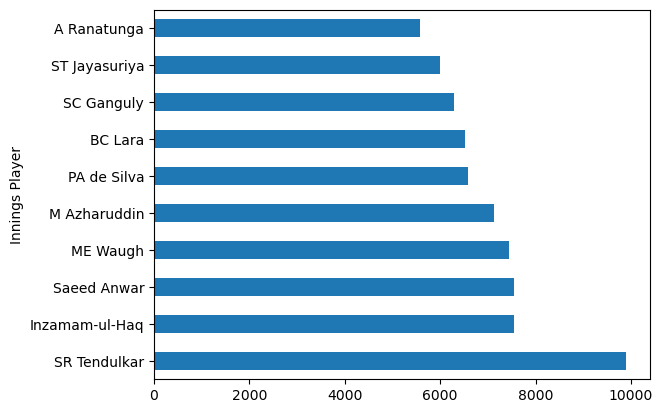

In [69]:
sachin_era.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

In [70]:
kohli_era.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)

Innings Player
V Kohli           11247
RG Sharma         8083 
HM Amla           7745 
TM Dilshan        7296 
KC Sangakkara     7275 
AB de Villiers    7247 
LRPL Taylor       7059 
MS Dhoni          6838 
EJG Morgan        6748 
MJ Guptill        6626 
Name: Innings Runs Scored Num, dtype: int64

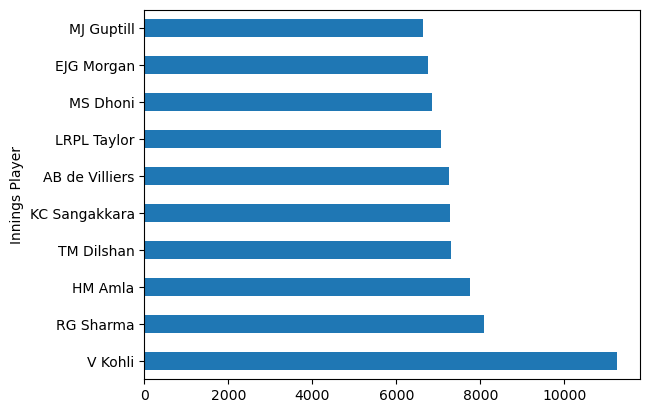

In [71]:
kohli_era.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

<AxesSubplot:xlabel='year'>

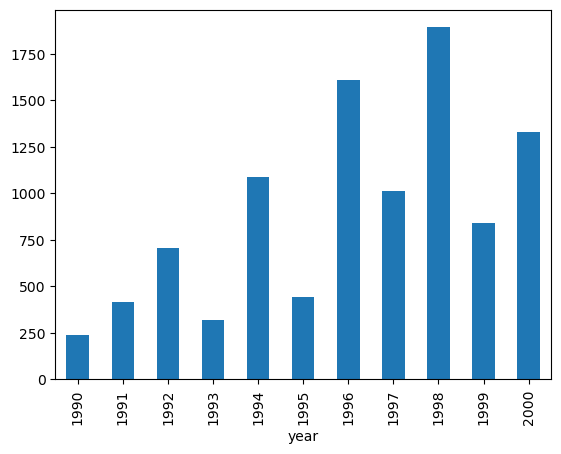

In [72]:
sachin_stats.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='year'>

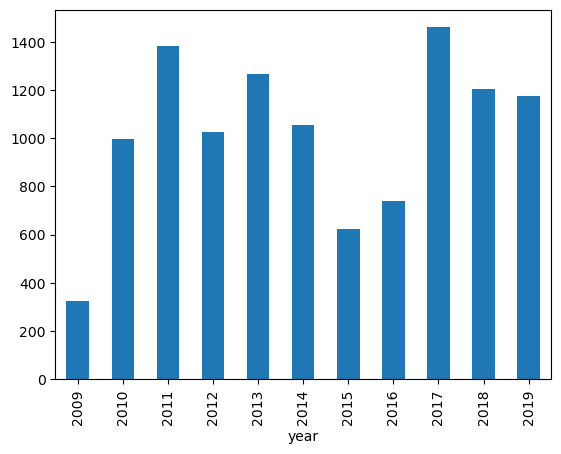

In [73]:
kohli_stats.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

NORMALIZATION

In [74]:
non_kohli_stats = kohli_era[kohli_era['Innings Player'] != 'V Kohli']

In [75]:
non_sachin_stats = sachin_era[sachin_era['Innings Player'] != 'SR Tendulkar']

In [76]:
#kohli_RPI vs #nonKohliRPI
(sum(kohli_stats['Innings Runs Scored Num'])/len(kohli_stats))/(sum(non_kohli_stats['Innings Runs Scored Num'])/len(non_kohli_stats))
#normalizedkohliRPI

2.029683688052565

In [77]:
(sum(sachin_stats['Innings Runs Scored Num'])/len(sachin_stats))/(sum(non_sachin_stats['Innings Runs Scored Num'])/len(non_sachin_stats))
#normalizedSachinRPI

1.770552190744722

In [78]:
#normalizedKohliSR
(100*sum(kohli_stats['Innings Runs Scored Num'])/sum(kohli_stats['Innings Balls Faced']))/(100*sum(non_kohli_stats['Innings Runs Scored Num'])/sum(non_kohli_stats['Innings Balls Faced']))

1.121468839996732

In [79]:
#normalizedSachinSR
(100*sum(sachin_stats['Innings Runs Scored Num'])/sum(sachin_stats['Innings Balls Faced']))/(100*sum(non_sachin_stats['Innings Runs Scored Num'])/sum(non_sachin_stats['Innings Balls Faced']))

1.2325899194808683

In [80]:
# sachin matches per 100
len(sachin_stats)/sum(sachin_stats["100's"])

9.444444444444445

In [81]:
# sachin peers - matches per 100
len(non_sachin_stats)/sum(non_sachin_stats["100's"])

53.96060606060606

In [82]:
# kohli matches per 100
len(kohli_stats)/sum(kohli_stats["100's"])

5.333333333333333

In [83]:
# kohli peers - matches per 100
len(non_kohli_stats)/sum(non_kohli_stats["100's"])

29.311827956989248

In [84]:
# normalized sachin value
sachin_mper_100 = len(sachin_stats)/sum(sachin_stats["100's"])
sachin_peers_mper_100 = len(non_sachin_stats)/sum(non_sachin_stats["100's"])
sachin_mper_100/sachin_peers_mper_100

0.17502480298010145

In [85]:
# normalized virat value
kohli_mper_100 = len(kohli_stats)/sum(kohli_stats["100's"])
kohli_peers_mper_100 = len(non_kohli_stats)/sum(non_kohli_stats["100's"])
kohli_mper_100/kohli_peers_mper_100

0.18195157740278795

In [86]:
# sachin matches per 50
len(sachin_stats)/sum(sachin_stats["50's"])

5.1

In [87]:
# sachin peers - matches per 50
len(non_sachin_stats)/sum(non_sachin_stats["50's"])

8.475487862922417

In [88]:
# kohli matches per 50
len(kohli_stats)/sum(kohli_stats["50's"])

4.226415094339623

In [89]:
# kohli peers - matches per 50
len(non_kohli_stats)/sum(non_kohli_stats["50's"])

7.673469387755102

In [90]:
# normalized sachin 50s value
sachin_mper_50 = len(sachin_stats)/sum(sachin_stats["50's"])
sachin_peers_mper_50 = len(non_sachin_stats)/sum(non_sachin_stats["50's"])
sachin_mper_50/sachin_peers_mper_50

0.6017352726455888

In [91]:
# normalized virat 50s value
kohli_mper_50 = len(kohli_stats)/sum(kohli_stats["50's"])
kohli_peers_mper_50 = len(non_kohli_stats)/sum(non_kohli_stats["50's"])
kohli_mper_50/kohli_peers_mper_50

0.5507828181453231